<a href="https://www.kaggle.com/code/thomasdamon/an-exploration-of-data-visualization-libraries?scriptVersionId=102521679" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction
This is my first real notebook project. It shows the Dow Jones Industrial Index performance for each president since 1896. The dataset is based on a spreadsheet I put together a few years ago, and this is my first submission to the Kaggle community. The graph from the orignal spreadsheet may be viewed here:

https://github.com/nomadmot/Stock-Market-and-Presidents/blob/c77818fb82547f37086cd04af867a4679c088885/IMG_D458B8F7F2A9-1.jpeg

## Problem Statement

The goal is to replicate and improve the graph from the original spreadsheet using Python. Since I've only been using Python for the last month or so, the results are admittedly ugly at this point. I will use this notebook as a canvas and learning tool to inprove my coding and data visualization skills. Each iteration will be saved as a new version. Code changes and new tasks will be documented in the Changes and To-Do sections at the bottom.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# load the input data file from the read-only "../input/" directory
filename = "/kaggle/input/dow-jones-performant-by-president/market-performance-by-president_1.csv"
data = pd.read_csv(filename)

# let's see what we got
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   President       22 non-null     object 
 1   Affliliation    22 non-null     object 
 2   Begin Date      22 non-null     object 
 3   Begin DOW       22 non-null     float64
 4   End Date        22 non-null     object 
 5   End DOW         22 non-null     float64
 6   Amount Change   22 non-null     float64
 7   Percent Change  22 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.5+ KB


,President,Affliliation,Begin Date,Begin DOW,End Date,End DOW,Amount Change,Percent Change
0,William McKinley,Republican,1897-03-04,41.34,1901-09-14,67.25,25.91,0.63
1,Theodore Roosevelt,Republican,1901-09-14,67.25,1909-03-04,81.79,14.54,0.22
2,William Taft,Republican,1909-03-04,81.79,1913-03-04,80.71,-1.08,-0.01
3,Woodrow Wilson,Democrat,1913-03-04,80.71,1921-03-04,75.11,-5.60,-0.07
4,Warren Harding,Republican,1921-03-04,75.11,1923-08-02,88.20,13.09,0.17


## Seaborn and Matplotlib
Seaborn is a simplified front-end for the Matplotlib library. It uses a declarative style to create simple plots, and is therefore limited in its capabilities. According to the documentation, Seaborn doesn't really support two axes on the same plot. This first try will include two side-by-side subplots. The first subplot will display the "Percent Change" for each president, and the second will show the value of the Dow Jones Industrial Index at the end of the presidents term.

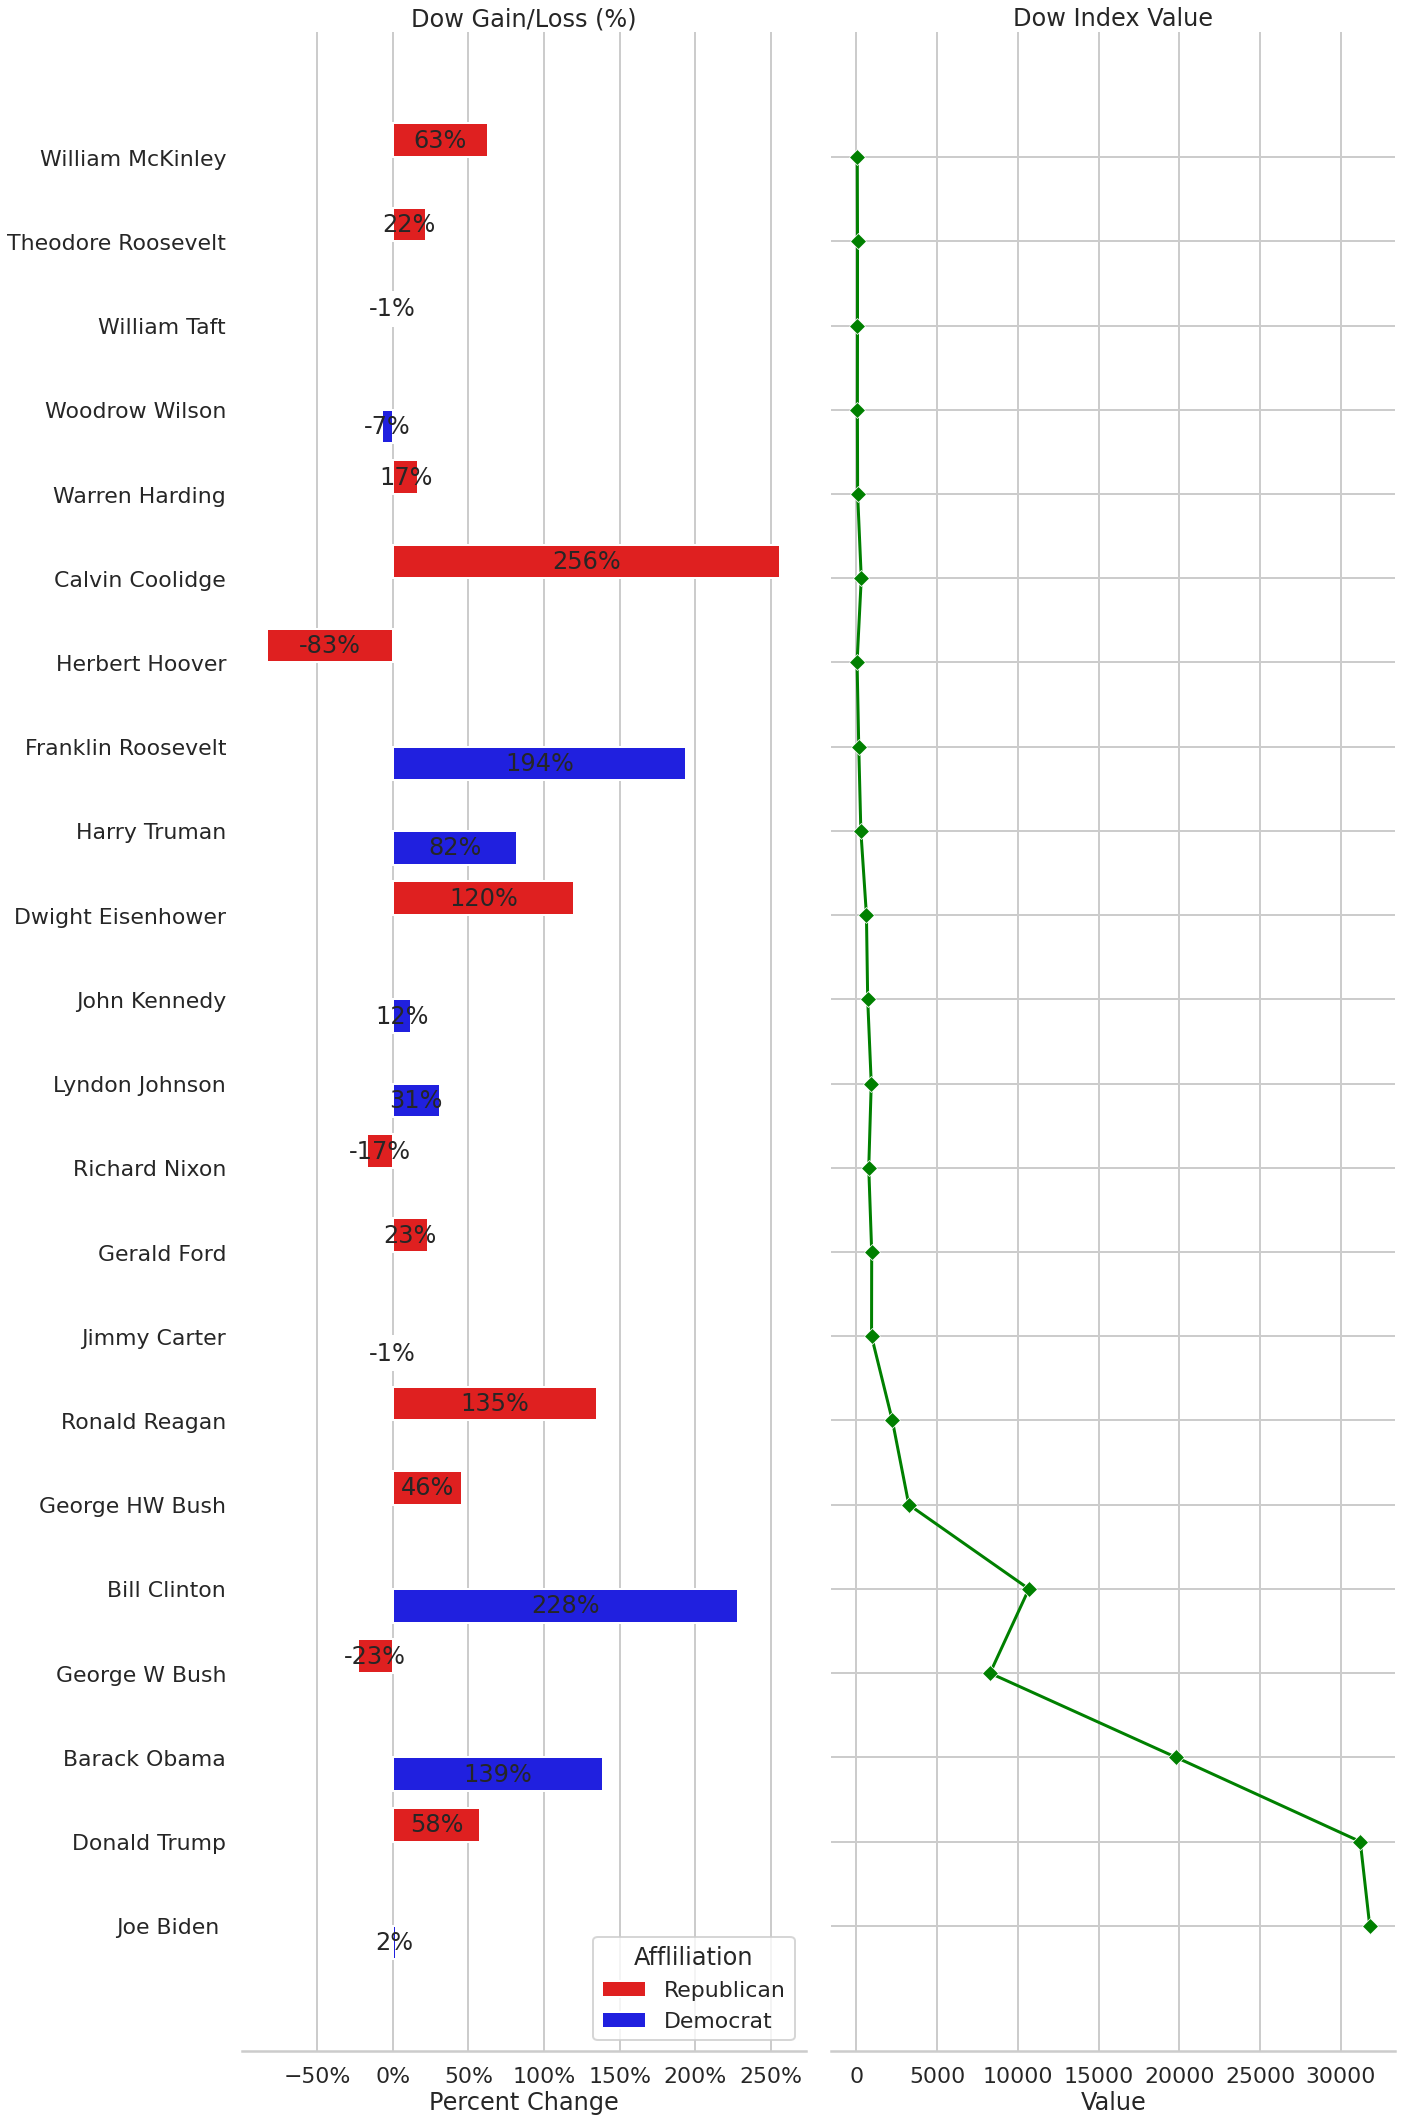

In [2]:
# for this simple example, we'll create a visualization with matplotlib and seaborn
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import math
%matplotlib inline 

# the plot style and context must be set before creating the figure
sns.set_style("whitegrid")
sns.set_context("poster")

# create the figure with two subplots
fig, axs = plt.subplots(
    figsize = (20, 30),
    ncols = 2,
    layout = "tight",
    sharey = True)


# add a horizontal bar chart showing the percent change for each president
pltChange = sns.barplot(
    data = data,
    x = "Percent Change",
    y = "President",
    hue = "Affliliation",
    palette = {"Democrat":"b", "Republican":"r"},
    ax = axs[0])

# set the title for the plot
pltChange.set_title("Dow Gain/Loss (%)")

# add the "Percent Change" value to the bars
# there are two sets of bars in the plot, one for each category
barsChange = pltChange.containers[0]
barLabels = [math.nan if math.isnan(value) else str(round(value * 100)) + '%'
            for value in barsChange.datavalues]
pltChange.bar_label(barsChange,
                    labels = barLabels,
                    label_type = "center")
# add the "Percent Change" value to the second set of bars
barsChange = pltChange.containers[1]
barLabels = [math.nan if math.isnan(value) else str(round(value * 100)) + '%'
            for value in barsChange.datavalues]
pltChange.bar_label(barsChange,
                    labels = barLabels,
                    label_type = "center")

# format the x axis ticks as percent
pltChange.xaxis.set_major_formatter(tick.PercentFormatter(xmax=1))

# remove the y axis label ("President")
pltChange.set(ylabel = None)

# add a line plot showing the end value of the index for each president
pltValue = sns.lineplot(
    data = data,
    x = "End DOW",
    y = "President",
    sort = False,
    color = "g",
    marker = "D",
    ax = axs[1])

# set the title for the plot
pltValue.set_title("Dow Index Value")

# set the label for the x axis
pltValue.set(xlabel = "Value")

# make it look presentable
sns.move_legend(pltChange, "lower right")
sns.despine(
    left = True,
    right = True,
    top = True)

## Matplotlib and Seaborn: Lessons Learned
Well, that was fairly painful. I had to jump through a few hoops to get the "Percent Change" value into the bars. Plus, I really wanted to combine the two plots, rather than display them side-by-side. Overall, having to use both Seaborn and Matplotlib functions to accomplish my goals makes it seem somewhat schizophrenic.

I finally figured out why I had to run the cell twice for styling to take effect. I originally had the style and context assignment below the creation of the plots. However, the plots were already created and styled at that point, and could not be overidden. Moving the assignments above the plot creation fixed the problem.

After a lot of searching, the only way I could find to influence the size of the bars is to increase the overall size of the figure. I must be missing something.

## Matplotlib Alone
The Seaborn documentation states that it's intended for simple plots, and more advanced use cases should use Matplotlib. It specifically states that it's not possible to superimpose two plots, and my experiments seem to verify that. So, here's another try using straight Matplotlib and Pyplot.

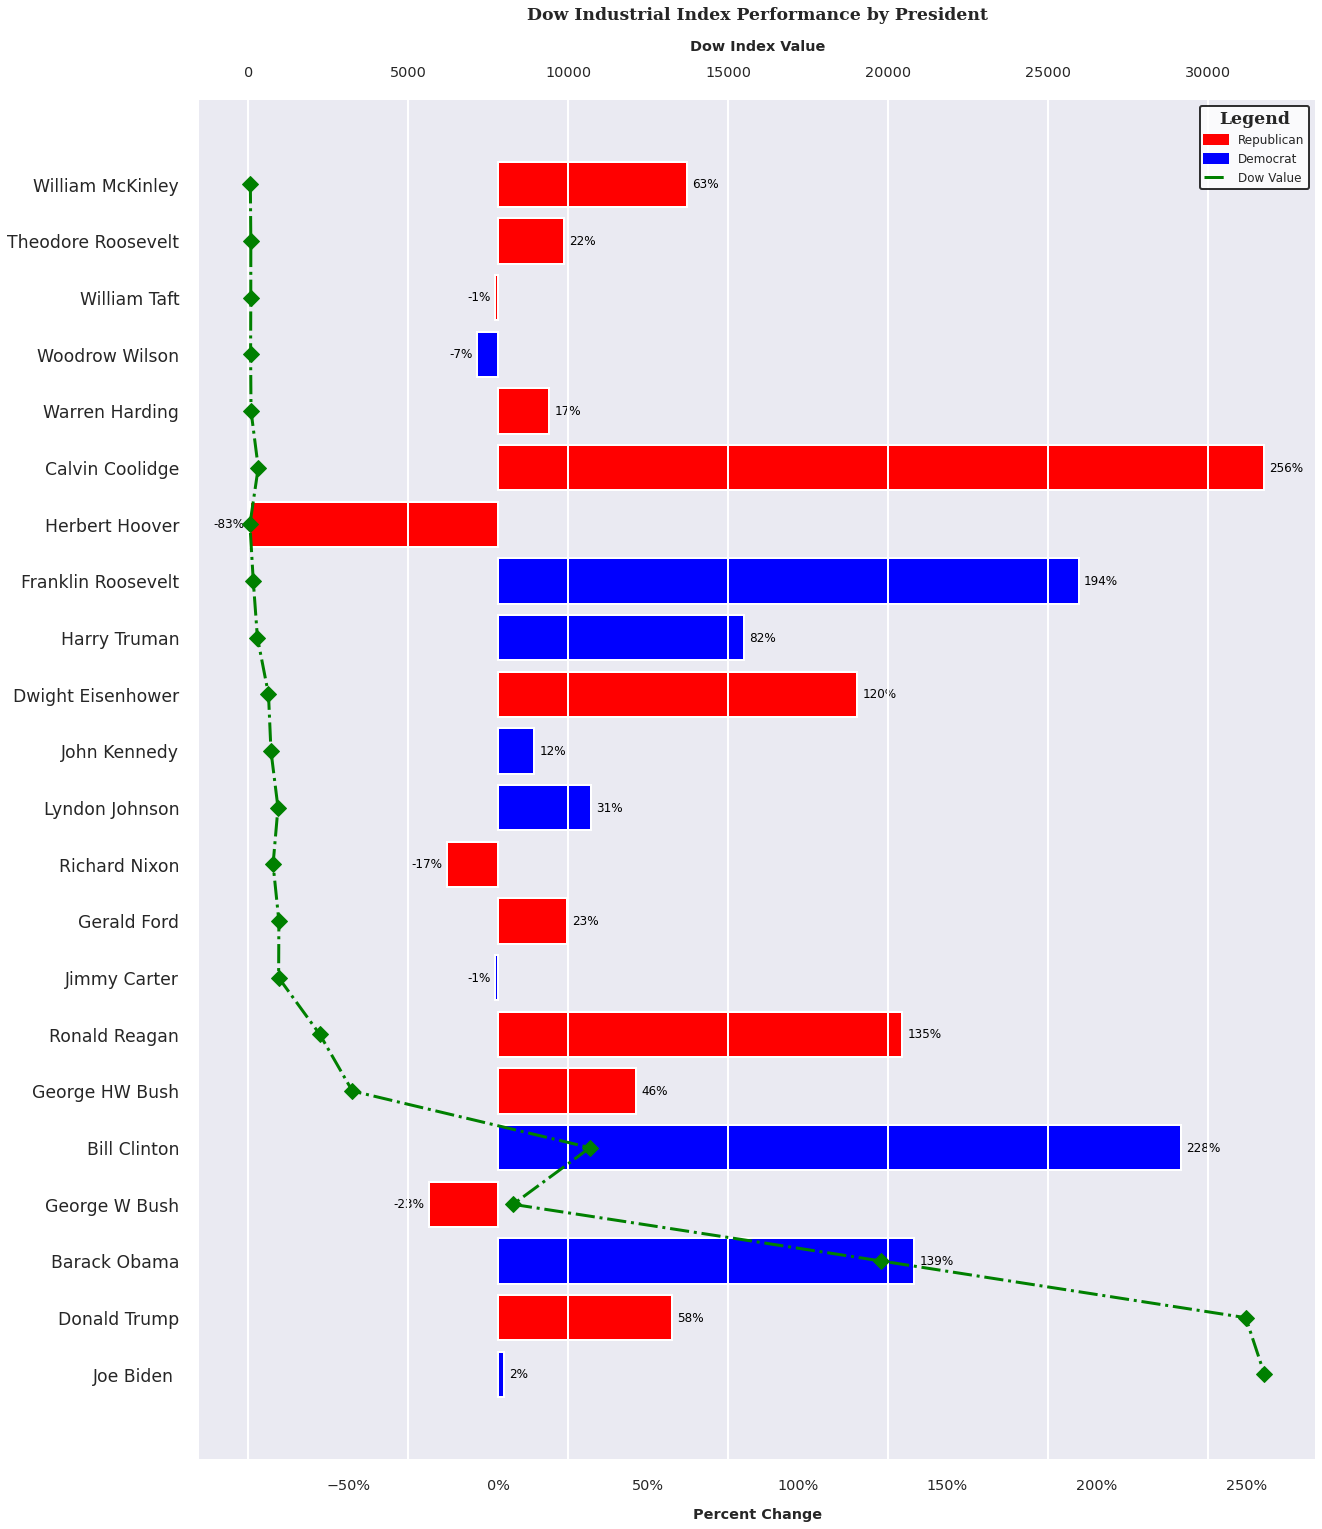

In [3]:
# try again using straight matplotlib and pyplot... no seaborn
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline 

# create some font dictionaries 
fontHeader = {"family":"serif",
              "weight":"extra bold",
              "size": "xx-large"}
fontSubhead = {"family":"sanserif",
              "weight":"normal",
               "size":"xx-large"}
fontLabel = {"family":"sanserif",
              "weight":"bold",
               "size":"x-large"}
fontTick = {"family":"sanserif",
              "weight":"normal",
               "size":"large"}

# do some initial styling
#plt.style.use("fivethirtyeight")
plt.style.use("seaborn-darkgrid")

# create the figure with a single subplot
fig, ax1 = plt.subplots(figsize = (20, 25))
plt.title("Dow Industrial Index Performance by President",
          pad = 20,
          fontdict = fontHeader)

# create the color map by party affliliation
colors = ["red" if party == "Republican" else "blue"
          for party in data["Affliliation"]]

# start with the first president at the top
ax1.invert_yaxis()

# create the bar chart
bars = ax1.barh("President",
                "Percent Change",
                data = data,
                zorder = 1,
                color = colors)

# add the "Percent Change" value to the bars
barLabels = [str(round(value * 100)) + '%'
             for value in bars.datavalues]
ax1.bar_label(bars,
              labels = barLabels,
              label_type = "edge",
              color = "black",
              fontproperties = fontTick,
              padding = 5,)

# no need to show the grid, since we put the values on the bars
ax1.grid(visible = False)

# add the line plot
ax2 = ax1.twiny()
line = ax2.plot("End DOW",
                "President",
                '-.Dg',
                data = data,
                zorder = 2)

# send the grid to the back
ax2.grid(zorder = 0) # why doesn't this work?

# format the x axis labels
ax1.set_xlabel("Percent Change",
               labelpad = 15,
               fontdict = fontLabel)
ax2.set_xlabel("Dow Index Value",
               labelpad = 15,
               fontdict = fontLabel)

# format the ticks
ax1.xaxis.set_major_formatter(tick.PercentFormatter(xmax=1))
ax1.tick_params("x",
                labelsize = "x-large",
                pad = 20)
ax1.tick_params("y",
                labelsize = "xx-large",
                pad = 20)

ax2.tick_params(labelsize = "x-large",
                pad = 20)

# set up the legend
# can't get the handles automatically, need to crate proxies
red_patch = mpatches.Patch(color='red', label='Republican')
blue_patch = mpatches.Patch(color='blue', label='Democrat')
green_line = mlines.Line2D([0,1],[0,0],
                           color ='green',
                           linestyle = '-.',
                           label = "Dow Value")
# put the legend on ax2 so it come on in front of the gridlines
ax2.legend(handles=[red_patch, blue_patch, green_line],
           prop = fontTick,
           title = "Legend",
           title_fontproperties = fontHeader,
           frameon = True,
           facecolor = "white",
           edgecolor = "black")

plt.show()

## Matplotlib Alone Lessons Learned
Bingo! That's more or less exactly what I wanted. For me, this was easier than using Seaborn... I didn't have to go searching through two sets of documentation to find the functions I needed.

That said, there is still one nagging problem: the grid lines are being drawn in front of the bars. I tried setting the zorder specifically, but that didn't seem to do anything.

It would be interesting to add some interaction.

## Plotly Express

Like Seaborn, Plotly Express is a simplfied front end for the Plotly visualization library. I will attempt to create the same visualization.

In [4]:
import plotly.express as px
import plotly.io as pio

# set the plot style
pio.templates.default = "plotly_white"

# sort the data by decreasing performance, since I can't get it to sort by timeline
sorted_data = data.sort_values(by=["Percent Change"],
                 ascending=False)

# create a bar chart showing the "Percent Change" for each president
fig = px.bar(data_frame = sorted_data,
             x = "Percent Change",
             y = "President",
             color = "Affliliation",
             color_discrete_map = {"Republican":"red", "Democrat":"blue"},
             title = "Dow Performance by President",
             height = 1000
            )

# format the x axis ticks as percent
fig.update_xaxes(tickformat = ".0%")

# remove the y axis label ("President")
fig.update_yaxes(title = "")
            
fig.show()

## Plotly Express: Lessons Learned
When I added the color_discrete_map based on the "Affliliation" column, Plotly insisted on sorting the plot based on that column. I decided to make the best of it and sorted the original data to display the results from worst to best performance based on the "Percent Change" column. However, since the plot is no longer sorted by timeline, I didn't add the plot for the Dow Jones value.

Other than the sorting problem, everything worked as expected. I really like how it automatically displays the data points when hovering over the bars.

## Changes
### Version 6
- Added the Problem Statement and created more structure for the text sections
- Added the Changes and To-Do sections
- Added a code section for Plotly Express
### Version 7
- Formatted the x axis ("Percent Changed") as an actual percent for both Seaborn and Plotly Express
- Added the "Percent Change" value to the bars in the Seaborn figure
- Removed the "Display Percent" hack
- Moved assignment of plot style above creation of plots in Seaborn so assignment takes effect immediately
- In Seaborn, increased the size of the figure and used context "Poster" to make the plot more readable
- In Seaborn, changed the "Dow Index Value" chart to a line plot
- Added the Bokeh library to the "To-Do" list
### Version 7.1
- Fixed problem with math.isnan() function
### Version 8
- Added a section using Matplotlib and Pyplot - no Seaborn

## To-Do
- Move the grid lines on the Matplotlib visualization to the back.
- Add interaction to the Matplotlib visualization
- Sort the Plotly visualization by date and add "End DOW" as a scatter or line plot
- Add a section using the Bokeh library